<p align="center">
  <span style="color:Navy; font-size:200%; font-weight:bold; vertical-align:middle;">
    Temas Selectos: Python para Ciencias de la Tierra
  </span>
  <img src="attachment:LOGO_ENCIT.png" alt="ENCiT" width="150" style="vertical-align:middle; margin-left:20px;"/>
</p>
<p align="center" style="line-height:1.2;">
  <span style="color:RoyalBlue; font-size:160%;">Tema 3: Análisis espacial</span><br/>
  <span style="color:DodgerBlue; font-size:140%;">Notebook 2: Cartopy </span><br/>
  <span style="font-size:100%;color:forestgreen"> Escuela Nacional de Ciencias de la Tierra  |  Semestre 2026-I</span>
</p>

---

## **<font color="ForestGreen">  Usando Cartopy </font>**

Cartopy es una biblioteca de Python diseñada para el mapeo de datos geoespaciales. Proporciona un conjunto de herramientas para crear mapas geográficos interactivos y visualizar datos sobre mapas utilizando la sintaxis familiar de Matplotlib. Algunas de las características principales de Cartopy incluyen:

1. Soporte para Proyecciones Geoespaciales
Cartopy ofrece soporte para una amplia gama de proyecciones geográficas y proyecciones de mapa, lo que permite representar de manera precisa la forma y la geometría de la Tierra en mapas. Esto incluye proyecciones comunes como Mercator, Orthographic, Plate Carrée, entre otras.

2. Integración con Matplotlib
Cartopy se integra perfectamente con Matplotlib, lo que facilita la creación de mapas geoespaciales utilizando las funciones y la sintaxis familiares de Matplotlib. Esto permite a los usuarios agregar capas de datos geoespaciales, personalizar la apariencia de los mapas y crear visualizaciones interactivas de manera fácil y eficiente.

3. Acceso a Datos Geoespaciales
Cartopy proporciona acceso a una amplia gama de datos geoespaciales, como límites políticos, límites costeros, ríos, lagos, relieve topográfico y más. Estos datos están disponibles como características integradas que pueden agregarse a los mapas con solo unas pocas líneas de código.

Todo sobre cartopy: https://scitools.org.uk/cartopy/docs/latest/

In [2]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

### **<font color="ForestGreen">  Primeros pasos con cartopy </font>**

Cartopy es un paquete estructurado alrededor de Sistema de Referencia de Coordenadas, ccrs es un alias para cartopy.crs, donde crs significa "Coordinate Reference Systems". En estos diferentes sistemas de coordenadas, están configuradas varias maneras de hacer mapas, proyecciones, capas que se pueden agregar. 

En la siguiente celda al utilizar `import cartopy.crs as ccrs`, estamos importando todo el módulo `cartopy.crs` y creando un alias `ccrs` para acceder a él de manera más concisa en nuestro código.

En la otra línea importamos al paquete `cartopy.feature`, el cuál proporciona clases y funciones para agregar características a los mapas, como límites políticos, límites costeros, ríos, lagos, etc.

In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#### **<font color="ForestGreen">  Primer mapa </font>**

El primer mapa se hará de manera muy sencilla. Se hará utilizando la proyección de Mercator de manera global y agregaremos las líneas costeras. 

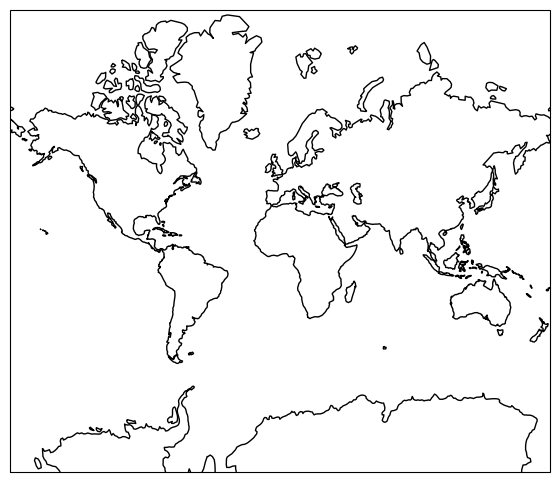

In [4]:
# Crear una figura y ejes
fig = plt.figure(figsize=(10, 6))

# generamos un eje pero lo hacemos con una proyección de cartopy
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

# Agregar características del mapa
ax.coastlines()

#### **<font color="ForestGreen">  Mapa 2: las features </font>**

En el segundo mapa haremos uso de las "features" o de las capas que podemos añadir a nuestros mapas. 
El detalle completo de estos features lo podemos encontrar aquí: https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html. 

Específicamente, vamos a agregar 1) fronteras, 2) diferencia tierra océano, 3) lagos y ríos. 

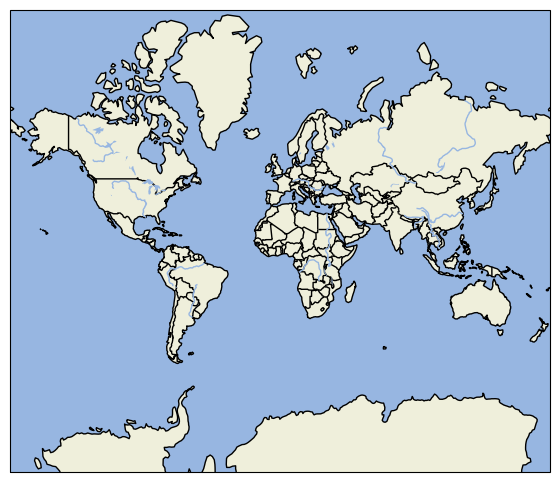

In [5]:
# Crear una figura y ejes
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

# Agregar características del mapa
# lineas costeras
ax.coastlines()
# fronteras
ax.add_feature(cfeature.BORDERS)
# tierra
ax.add_feature(cfeature.LAND)
# oceano
ax.add_feature(cfeature.OCEAN)
# lagos
ax.add_feature(cfeature.LAKES)
# rios
ax.add_feature(cfeature.RIVERS)

#### **<font color="ForestGreen">  Mapa 3: las proyecciones </font>**

En Cartopy, una proyección se refiere a la técnica utilizada para representar la superficie tridimensional de la Tierra en un plano bidimensional, como un mapa. Dado que la Tierra es esférica, no es posible representar su superficie de manera precisa en un plano sin distorsionar alguna de sus propiedades, como la forma, la distancia o el área.

Algunas de las proyecciones disponibles en Cartopy:

**1. Proyecciones Cilíndricas:**

- Mercator: Conserva la forma y las direcciones, pero distorsiona el tamaño y la distancia a medida que te alejas del ecuador. Útil para navegación marítima y visualización de datos globales. `cartopy.crs.Mercator()`
- Plate Carrée (Cilíndrica Equidistante): Mapea la longitud y la latitud directamente a coordenadas X e Y, lo que provoca distorsiones en las áreas. `cartopy.crs.PlateCarree()`
- Transversa de Mercator: Similar a la proyección Mercator, pero el cilindro se coloca perpendicular al ecuador. Útil para regiones polares.  `cartopy.crs.TransverseMercator()`.

2. Proyecciones Cónicas:

- Cónica Conforme de Lambert: Conserva los ángulos y, por lo tanto, la forma de las regiones pequeñas, pero distorsiona el tamaño y la forma de las regiones más grandes. Útil para mapas regionales. `cartopy.crs.LambertConformal()`
- Albers Equal Area: Conserva las áreas, pero distorsiona las formas y las distancias. `cartopy.crs.AlbersEqualArea()`

3. Proyecciones Azimutales:

- Orthographic: Muestra el hemisferio visible desde un punto de vista infinitamente lejano. Útil para visualizaciones globales y representaciones artísticas. `cartopy.crs.Orthographic()`
    Estereográfica: Proyecta desde un punto (el polo) en una superficie plana. Útil para regiones polares. `cartopy.crs.Stereographic()`

4. Otras Proyecciones Especiales:

- Mollweide: Proyección pseudo-cónica que minimiza la distorsión de área. Útil para visualización global. `cartopy.crs.Mollweide()`
- Robinson: Proyección pseudocilíndrica que equilibra la distorsión en las formas y las áreas. Útil para mapas mundiales generales. `cartopy.crs.Robinson()`

https://scitools.org.uk/cartopy/docs/latest/reference/projections.html

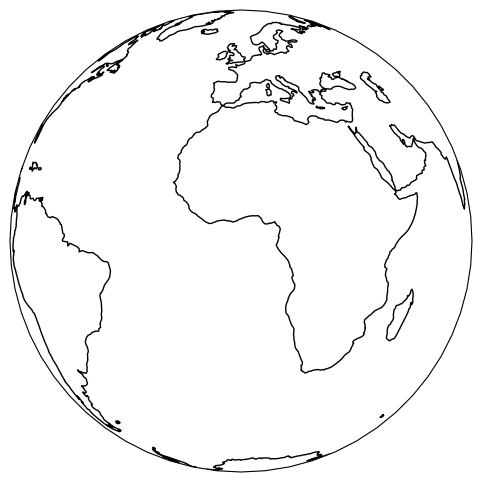

In [3]:
# Crear una figura y ejes
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic())

# Agregar características del mapa
ax.coastlines()

#### **<font color="ForestGreen">  Mapa 4: definiendo la extensión de un mapa </font>**

Definir la extensión de un mapa en Cartopy se refiere a especificar el área geográfica que se desea visualizar en el mapa. Esto se hace mediante la definición de los límites en términos de latitud y longitud que delimitan la región que se desea representar en el mapa.

Para hacerlo global se usa: `ax.set_global()`. Además en este mapa agregamos la opción de agregar una imagen de relieve `ax.stock_img()` que le da un toque un poquito más realista al mapa. 

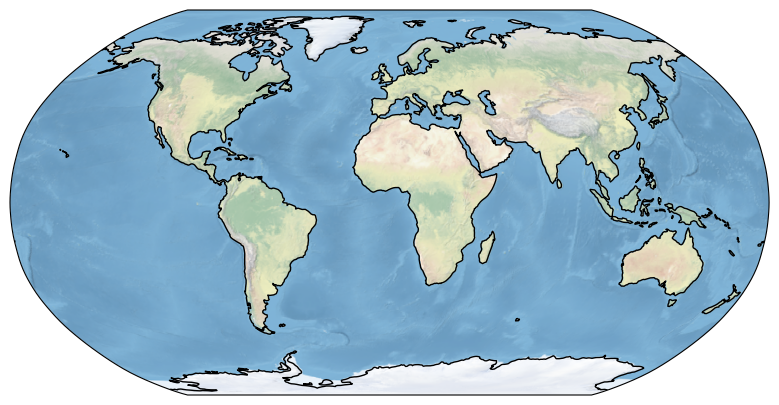

In [4]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# hacer el mapa global
ax.set_global()

# agregar imagen de fondo
ax.stock_img()
ax.coastlines()

Ahora vamos a usar la instrucción de `ax.set_extent()` la cuál sigue una serie de parámetros para definir la extensión del mapa. Es decir, los límites a donde se concentra el mapa. 

La instrucción requiere de 4 argumentos en el siguiente orden: 

- $lon_{min}$: longitud mínima del mapa. Puede ser en grado Oeste o Este. 
- $lon_{max}$: longitud máxima del mapa. 
- $lat_{min}$: latitud mínima del mapa, la latitud está definida en el intervalo [-90,90]. 
- $lat_{max}$: latitud máxima del mapa, la latitud está definida en el intervalo [-90,90]. 


De manera que si queremos modificar el mapa y hacerlo para una región que englobe a México. Podemos hacer la siguiente celda:

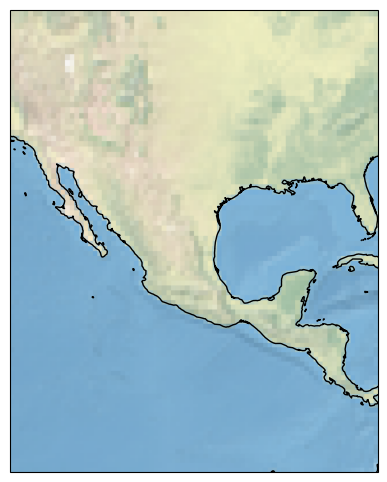

In [5]:
# Crear una figura y ejes
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
# set_extent([lonmin,lonmax,latmin,latmax])
ax.set_extent([-120, -80, 0, 45], crs=ccrs.PlateCarree())

ax.stock_img()
# Agregar características del mapa
ax.coastlines()



In [9]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

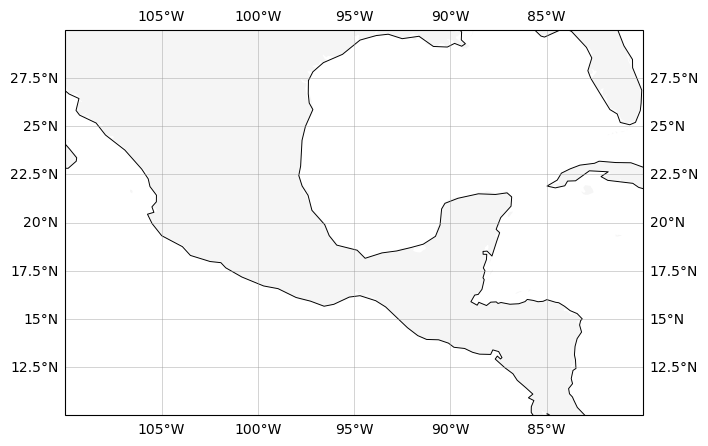

In [7]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-110, -80, 10, 30], crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND, facecolor="whitesmoke")
ax.coastlines(resolution="110m", linewidth=0.7)

gl = ax.gridlines(draw_labels=True, linewidth=0.5, color="0.6", alpha=0.6)


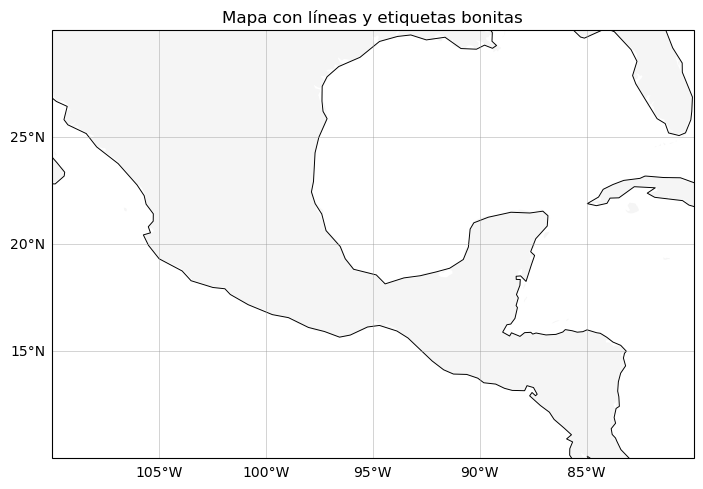

In [11]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes(projection=ccrs.PlateCarree())
# definimos extensión del mapa (110 Oeste a 80 Oeste, 10 N a 30 N)
ax.set_extent([-110, -80, 10, 30], crs=ccrs.PlateCarree())

# Agregamos masa continental de color gris
ax.add_feature(cfeature.LAND, facecolor="whitesmoke")
# La resolucion de la linea de costa la ponemos de 110 m, que pasa si usamos mayor resolución?
ax.coastlines(resolution="110m", linewidth=0.7)

# agregamos lineas de grid para saber donde esta la cuadricula
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color="0.6", alpha=0.6)
# bonitas etiquetas en coordenadas especificas (xticks and yticks)
gl.xlocator = mticker.FixedLocator([-110, -105, -100, -95, -90, -85, -80])
gl.ylocator = mticker.FixedLocator([10, 15, 20, 25, 30])

# simbolos de grado y formateo E/W/N/S:
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# solo etiquetas a la izquierda y abajo, no arriba y a la derecha
gl.top_labels = False
gl.right_labels = False

ax.set_title("Mapa con líneas y etiquetas bonitas")
plt.tight_layout()

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 7 - Mapa 1 </font>**

<font color="DarkBlue"> 1. Haga un mapa con cartopy utilizando la proyección "AzimuthalEquidistant", utilizando la imagen de fondo de stock de relieve. Modifique los límites del gráfico a que sólo muestre de la latitud 45 hacia el norte. 
        
---



En Cartopy, puedes agregar una variedad de tipos de datos a un mapa para visualizar información geoespacial. Algunos de los tipos de datos comunes que se pueden agregar incluyen:

1. Puntos (`.scatter()`):

Puedes agregar puntos individuales en el mapa utilizando el método `.scatter()` de Matplotlib. Esto es útil para mostrar ubicaciones específicas, como estaciones meteorológicas, ciudades, o puntos de interés.

2. Líneas (`.plot()`):

Puedes trazar líneas o polígonos en el mapa utilizando el método `.plot()` de Matplotlib. Esto es útil para representar características geográficas como ríos, fronteras políticas, límites costeros, etc.

3. Contornos Rellenos (`.contourf()`):

Puedes crear contornos rellenos utilizando el método `.contourf()` de Matplotlib. Esto es útil para visualizar datos de grilla, como la temperatura, la presión, la precipitación, etc., en un mapa.

4. Imágenes de Colores (`.imshow()`):

Puedes mostrar imágenes de colores en el mapa utilizando el método `.imshow()` de Matplotlib. Esto es útil para visualizar datos raster, como imágenes satelitales, mapas de relieve, imágenes de radar, etc.

5. Mapas de Calor (`.pcolormesh()`):

Puedes crear mapas de calor utilizando el método `.pcolormesh()` de Matplotlib. Esto es útil para visualizar datos de grilla con colores escalares, como la temperatura superficial del mar, la concentración de clorofila, etc.

6. Texto y Anotaciones:

Puedes agregar texto y anotaciones al mapa utilizando las funciones de texto de Matplotlib. Esto es útil para etiquetar características geográficas, agregar leyendas, títulos, etc.

Estos son solo algunos ejemplos de los tipos de datos que se pueden agregar a un mapa en Cartopy. La flexibilidad y la integración con Matplotlib permiten una amplia gama de posibilidades para visualizar datos geoespaciales de manera efectiva y atractiva.

#### **<font color="ForestGreen">  Mapa 5: agregando un punto </font>**

En el siguiente mapa vamos a aprender a agregar puntos rojos en lugares de Norteamérica. 

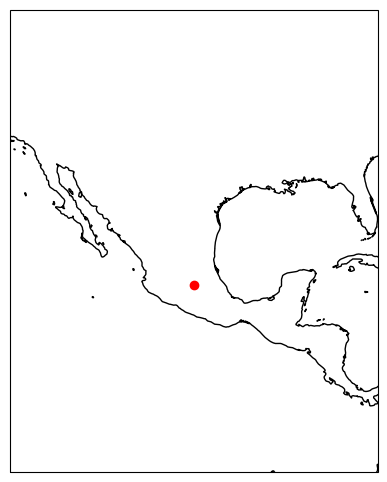

In [9]:
# Crear una figura y ejes
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([-120, -80, 0, 45], crs=ccrs.PlateCarree())

# Agregar características del mapa
ax.coastlines()

# Agregar puntos de datos
lats = [20]
lons = [-100]
ax.scatter(lons, lats, color='red', transform=ccrs.PlateCarree())

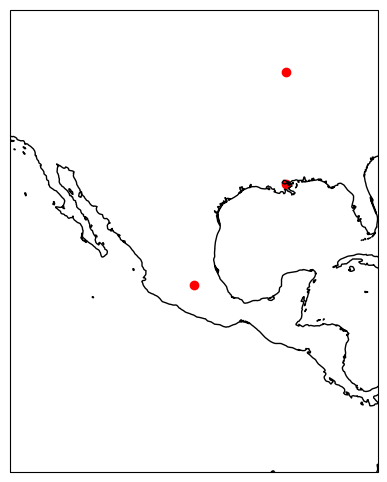

In [10]:
# Crear una figura y ejes
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([-120, -80, 0, 45], crs=ccrs.PlateCarree())

# Agregar características del mapa
ax.coastlines()

# Agregar puntos de datos
lats = [20,30,40]
lons = [-100,-90,-90]
ax.scatter(lons, lats, color='red', transform=ccrs.PlateCarree())

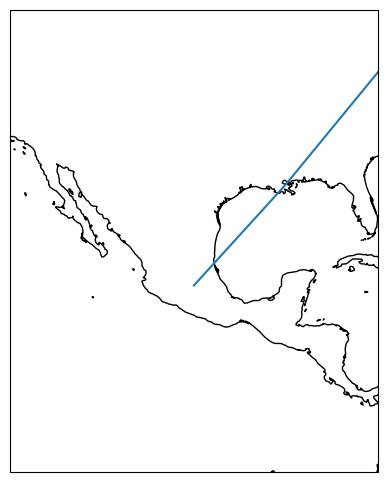

In [13]:
# Crear una figura y ejes
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([-120, -80, 0, 45], crs=ccrs.PlateCarree())

# Agregar características del mapa
ax.coastlines()

# Agregar puntos de datos
lats = [20,30,40]
lons = [-100,-90,-80]
ax.plot(lons, lats, color='tab:blue', transform=ccrs.PlateCarree())

#### **<font color="ForestGreen">  Mapas con datos de HadSST </font>**

En el notebook anterior trabajamos con los datos de HadSST e hicimos algunas gráficas de línea, pero también podemos hacer mapas. Recuerden que estos datos están como "_anomalías_". Esto quiere decir que los datos no reportan temperatura superficial del mar absoluta sino diferencias entre cada punto e instante de tiempo con respecto a un valor predeterminado. El valor predeterminado es el promedio en cada punto para el periodo de 1961-1990. 


Para empezar a trabajar con los datos y hacer un mapa se puede seguir el siguiente diagrama de flujo:

1. Cargar los datos. 
2. Procesar los datos, algún promedio o selección temporal se tiene que hacer. 
3. Hacer el mapa.

In [14]:
# abrimos el dataset
ds=xr.open_dataset('HadSST.4.0.1.0_median.nc')
ds

<xarray.Dataset> Size: 22MB
Dimensions:         (time: 2090, latitude: 36, longitude: 72, bnds: 2)
Coordinates:
  * time            (time) datetime64[ns] 17kB 1850-01-16T12:00:00 ... 2024-0...
  * latitude        (latitude) float64 288B -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude       (longitude) float64 576B -177.5 -172.5 ... 172.5 177.5
Dimensions without coordinates: bnds
Data variables:
    tos             (time, latitude, longitude) float32 22MB ...
    time_bnds       (time, bnds) datetime64[ns] 33kB ...
    latitude_bnds   (latitude, bnds) float64 576B ...
    longitude_bnds  (longitude, bnds) float64 1kB ...
Attributes:
    comment:      
    history:      Converted to netcdf today
    institution:  Met Office
    reference:    Kennedy et al. (2019), https://www.metoffice.gov.uk/hadobs/...
    source:       surface observation
    title:        Ensemble-median sea-surface temperature anomalies from the ...
    version:      HadSST.4.0.1.0
    Conventions:  CF-1.7

In [15]:
ds.variables

Frozen({'tos': <xarray.Variable (time: 2090, latitude: 36, longitude: 72)> Size: 22MB
[5417280 values with dtype=float32]
Attributes:
    standard_name:  sea_water_temperature_anomaly
    long_name:      Sea water temperature anomaly at a depth of 20cm
    units:          K
    cell_methods:   area: mean (interval: 5.0 degrees_north 5.0 degrees_east)..., 'time': <xarray.IndexVariable 'time' (time: 2090)> Size: 17kB
array(['1850-01-16T12:00:00.000000000', '1850-02-15T00:00:00.000000000',
       '1850-03-16T12:00:00.000000000', ..., '2023-12-16T12:00:00.000000000',
       '2024-01-16T12:00:00.000000000', '2024-02-15T12:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    axis:           T
    bounds:         time_bnds
    standard_name:  time
    long_name:      time, 'time_bnds': <xarray.Variable (time: 2090, bnds: 2)> Size: 33kB
[4180 values with dtype=datetime64[ns]], 'latitude': <xarray.IndexVariable 'latitude' (latitude: 36)> Size: 288B
array([-87.5, -82.5, -77.5, -72.5,

#### **<font color="ForestGreen">  Primer mapita sencillito </font>**

Un primer mapa podría ser el del promedio temporal de todas las anomalías de SST. Lean bien esta oración para que podamos entender bien esta oración. 

Para esto primero hacemos el promedio temporal del DataArray correspondiente a la variable `ds['tos']`. Esto se hace:

In [16]:
promedio_temporal=ds['tos'].mean('time')
print(promedio_temporal)

<xarray.DataArray 'tos' (latitude: 36, longitude: 72)> Size: 10kB
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [-0.24348556, -0.08268671, -0.12877007, ...,  0.12850012,
         0.1077027 , -0.17581147],
       ...,
       [ 1.5398502 ,  1.5136441 ,  1.5625608 , ...,         nan,
         1.8324167 ,  2.1468048 ],
       [ 1.9920365 ,         nan,         nan, ...,  1.4948993 ,
         1.5016713 ,  1.8706833 ],
       [        nan,         nan,         nan, ...,  1.9172359 ,
                nan,         nan]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 288B -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude  (longitude) float64 576B -177.5 -172.5 -167.5 ... 172.5 177.5


Muchas veces es útil guardar las coordenadas como variables aparte. Para hacer esto podemos hacer:

In [17]:
lats=ds.latitude
lons=ds.longitude

Ahora sí vamos a intentar hacer el mapa. Para esto copiamos la estructura de los últimos dos mapas y lo hacemos global. Noten bien que son datos en 2D entonces la instrucción de plot adecuada es para los gráficos de contorno. 

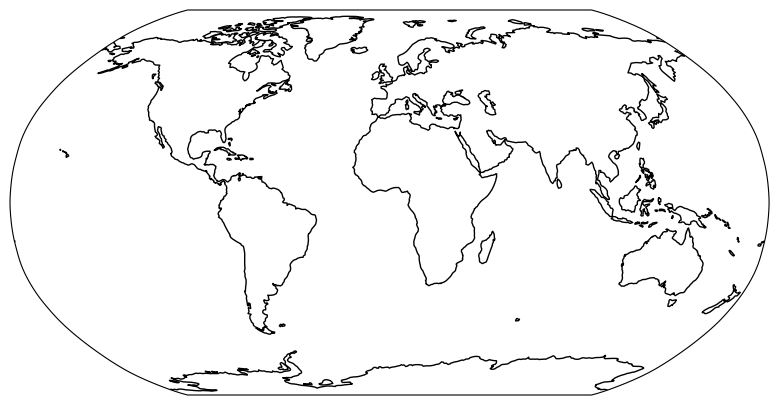

In [18]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# hacer el mapa global
ax.set_global()

ax.coastlines()
ax.contourf(lons,lats,promedio_temporal)

Parece ser que fracamos. ¿Cuál fue el problema?

El parámetro transform en Cartopy se utiliza para especificar la proyección de coordenadas en la que se encuentran los datos que se están graficando. Específicamente, transform indica la proyección en la que se encuentran las coordenadas de los datos que se pasan a la función de trazado (por ejemplo, `ax.plot()`, `ax.scatter()`, `ax.contour()`, etc.).

Entonces es muy importante añadir: `transform=ccrs.PlateCarree()`.

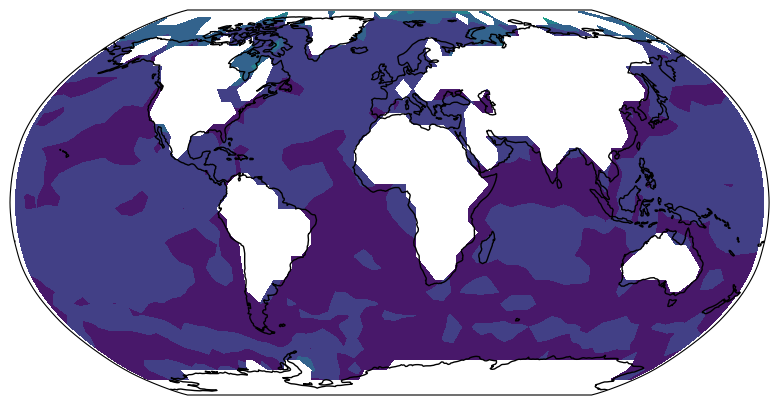

In [19]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# hacer el mapa global
ax.set_global()

ax.coastlines()
ax.contourf(lons,lats,promedio_temporal,transform=ccrs.PlateCarree())

**Nuestro plot está bastante feo**


Para empezar a mejorar el plot vamos a usar dos parámetros: 

En Matplotlib y Cartopy, los parámetros `levels` y `cmap` son utilizados para controlar el número de niveles de contorno y la paleta de colores, respectivamente.

1. levels: Este parámetro permite especificar los valores de los contornos. Puedes proporcionar una lista de valores para definir manualmente los niveles de contorno, o puedes especificar un número entero para que Matplotlib divida automáticamente el rango de datos en ese número de niveles. Por ejemplo, levels=10 dividirá el rango de datos en 10 niveles de contorno.

2. cmap: Este parámetro determina la paleta de colores que se utiliza para colorear los niveles de contorno. Puedes proporcionar el nombre de una paleta de colores predefinida de Matplotlib, como 'viridis', 'plasma', 'jet', etc. También puedes utilizar paletas de colores personalizadas o definir tu propia paleta de colores.

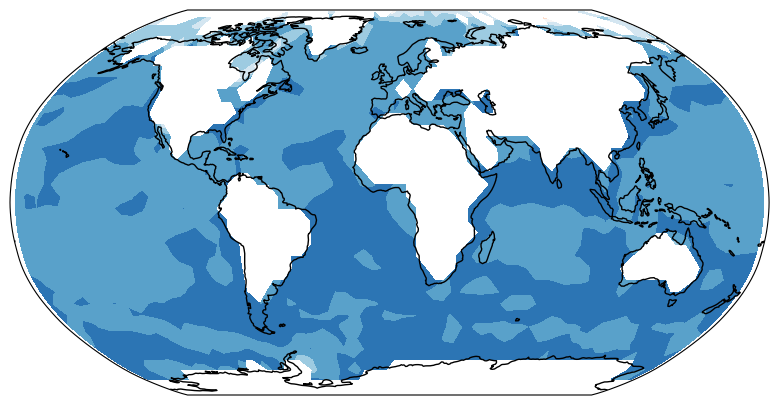

In [20]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# hacer el mapa global
ax.set_global()

ax.coastlines()
ax.contourf(lons,lats,promedio_temporal,levels=10,cmap='RdBu_r',transform=ccrs.PlateCarree())

**El colorbar**

En Matplotlib, para agregar un colorbar (barra de color) a un mapa, generalmente se utiliza la función `plt.colorbar()`. Esta función crea un colorbar asociado a la última figura activa y ajusta su tamaño automáticamente para que coincida con el gráfico principal. Sin embargo, en algunos casos, es necesario especificar el objeto al que se le va a agregar el colorbar utilizando la sintaxis `plt.colorbar(objeto)`.

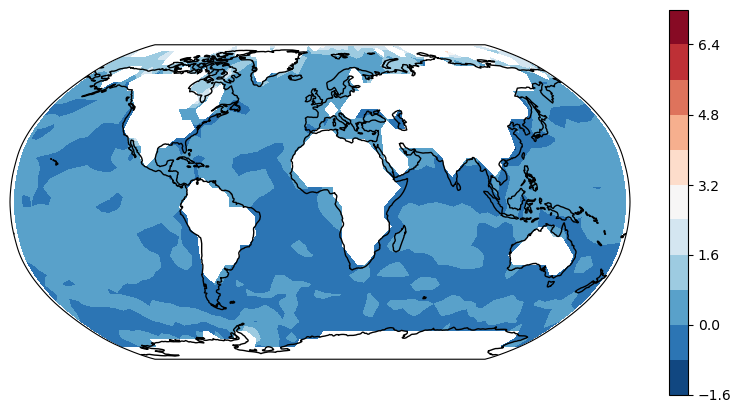

In [23]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# hacer el mapa global
ax.set_global()

ax.coastlines()
cs=ax.contourf(lons,lats,promedio_temporal,levels=10,cmap='RdBu_r',transform=ccrs.PlateCarree())
# agregamos colorbar
plt.colorbar(cs)

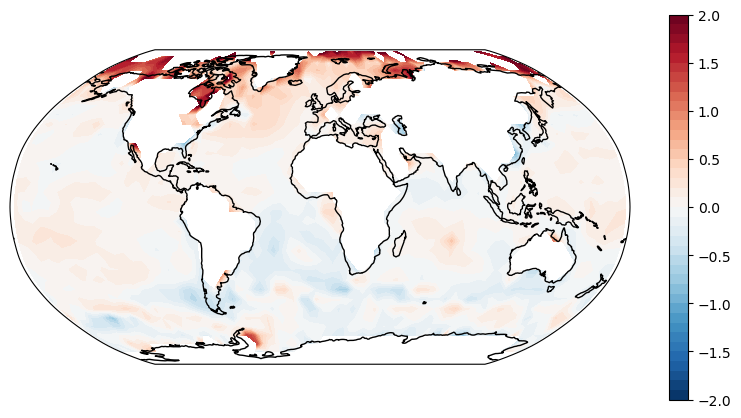

In [24]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

# hacer el mapa global
ax.set_global()

ax.coastlines()
cs=ax.contourf(lons,lats,promedio_temporal,levels=np.arange(-2,2.01,0.1),cmap='RdBu_r',transform=ccrs.PlateCarree())
# agregamos colorbar
plt.colorbar(cs)

Nuestro mapa ya está decente. Pero antes de pasar un rato mejorándolo vamos mejor a hacer otro análisis. 

#### **<font color="ForestGreen">  Mapa comparativo </font>**

Ahora vamos a otro análisis, en este caso una comparación entre las anomalías correspondientes al período 1950-1980 y las anomalías correspondientes al período 1990-2020.

Para hacer la comparación primero seleccionamos la variable "tos" del dataset. 

Luego hacemos un slice por el año de los datos. Para esto se hace la siguiente instrucción:

In [25]:
tos=ds['tos']
# seleccion periodo historico
tos_historic=tos[(tos.time.dt.year>1950)&(tos.time.dt.year<1980)]
# seleccion periodo actual
tos_actual=tos[(tos.time.dt.year>1990)&(tos.time.dt.year<2020)]
tos_historic

<xarray.DataArray 'tos' (time: 348, latitude: 36, longitude: 72)> Size: 4MB
array([[[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       ...,

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [4.169024,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 3kB 1951-01-16T12:00:00 ... 1979-12-16T1...
  * latitude   (latitude) float64 288B -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * longitude  (longitude) float64 576B -177.5 -172.5 -167.5 ... 172.5 177.5
Attributes:
    standard_name:  sea_water_temperature_anomaly
    long_name:      Sea water temperature anomaly at a depth of 20cm
    units:          K
    cell_methods:   area: mean (interval: 5.0 degrees_north 5.0 degrees_east)...

Luego a los datos recortados los promediamos por el "tiempo" y los guardamos en otra variable.

In [26]:
sst_hist_mean=tos_historic.mean('time')
sst_act_mean=tos_actual.mean('time')

Ahora sí pasamos a hacer el mapa. Para esto hacemos un par de subplots, el período histórico arriba y el actual abajo. Noten que modificamos el valor de "levels".

Text(0.5, 1.0, 'Periodo actual 1990-2020')

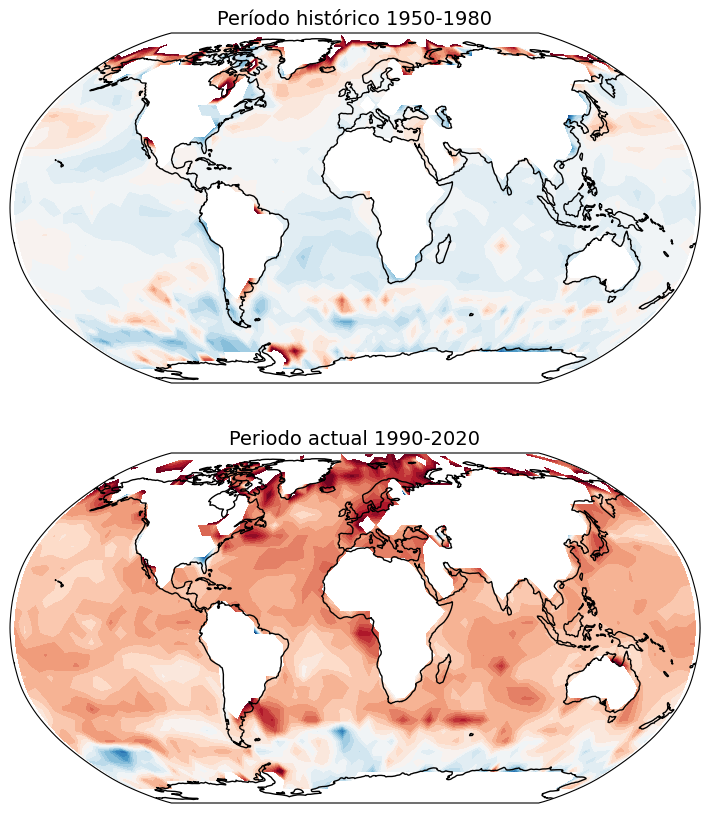

In [27]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2, 1, 1, projection=ccrs.Robinson())

# hacer el mapa global
ax.set_global()

ax.coastlines()
ax.contourf(lons,lats,sst_hist_mean,levels=np.arange(-1.3,1.31,0.1),cmap='RdBu_r',transform=ccrs.PlateCarree())
plt.title('Período histórico 1950-1980',fontsize=14)

# agregando segundo grafico
ax = fig.add_subplot(2, 1, 2, projection=ccrs.Robinson())

# hacer el mapa global
ax.set_global()

ax.coastlines()
ax.contourf(lons,lats,sst_act_mean,levels=np.arange(-1.3,1.31,0.1),cmap='RdBu_r',transform=ccrs.PlateCarree())
plt.title('Periodo actual 1990-2020',fontsize=14)

Text(0.5, 1.0, 'Periodo actual 1990-2020')

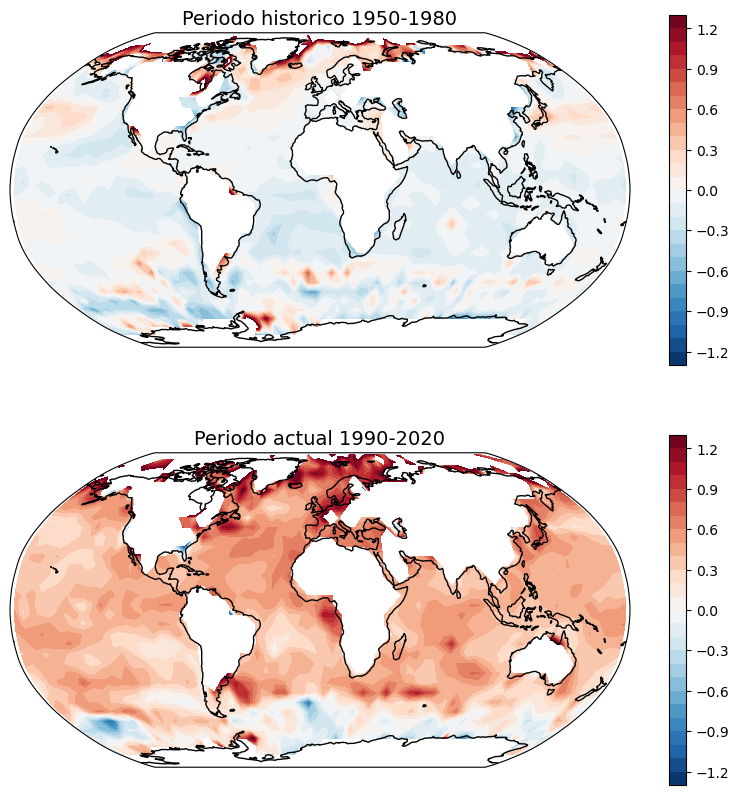

In [36]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2, 1, 1, projection=ccrs.Robinson())

# hacer el mapa global
ax.set_global()

ax.coastlines()
cs=ax.contourf(lons,lats,sst_hist_mean,levels=np.arange(-1.3,1.31,0.1),cmap='RdBu_r',transform=ccrs.PlateCarree())
plt.title('Periodo historico 1950-1980',fontsize=14)
plt.colorbar(cs)

ax = fig.add_subplot(2, 1, 2, projection=ccrs.Robinson())

# hacer el mapa global
ax.set_global()

ax.coastlines()
cs=ax.contourf(lons,lats,sst_act_mean,levels=np.arange(-1.3,1.31,0.1),cmap='RdBu_r',transform=ccrs.PlateCarree())
plt.colorbar(cs)
plt.title('Periodo actual 1990-2020',fontsize=14)

---
<a name='ej-1'></a>
### **<font color="OrangeRed">Ejemplo: Anomalías de El Niño </font>**

<font color="DarkRed"> Analice las anomalías de SST asociadas a eventos de El Niño. 
    
<font color="DarkRed">   1. Investigue cuáles han sido eventos fuertes de El Niño. 
    
<font color="DarkRed">    2. Seleccione datos solamente para los períodos de Enero-Marzo de los años considerados como El Niño. 
    
<font color="DarkRed">    3. Haga un mapa para cada evento y compare los resultados
</font>

---
    
  Empezaremos por el paso 2. 

In [28]:
# seleccionar datos de Ene-Mar
winter_data=tos[tos.time.dt.month<4]
print(winter_data)

<xarray.DataArray 'tos' (time: 524, latitude: 36, longitude: 72)> Size: 5MB
array([[[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       ...,

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.150556,      nan, ...,      nan,      nan],
        [     nan,      nan,

Los años que usaremos serán 1983, 1998, 2016. 

Dentro de un ciclo for, haremos iterativamente mapas, uno para cada año. 

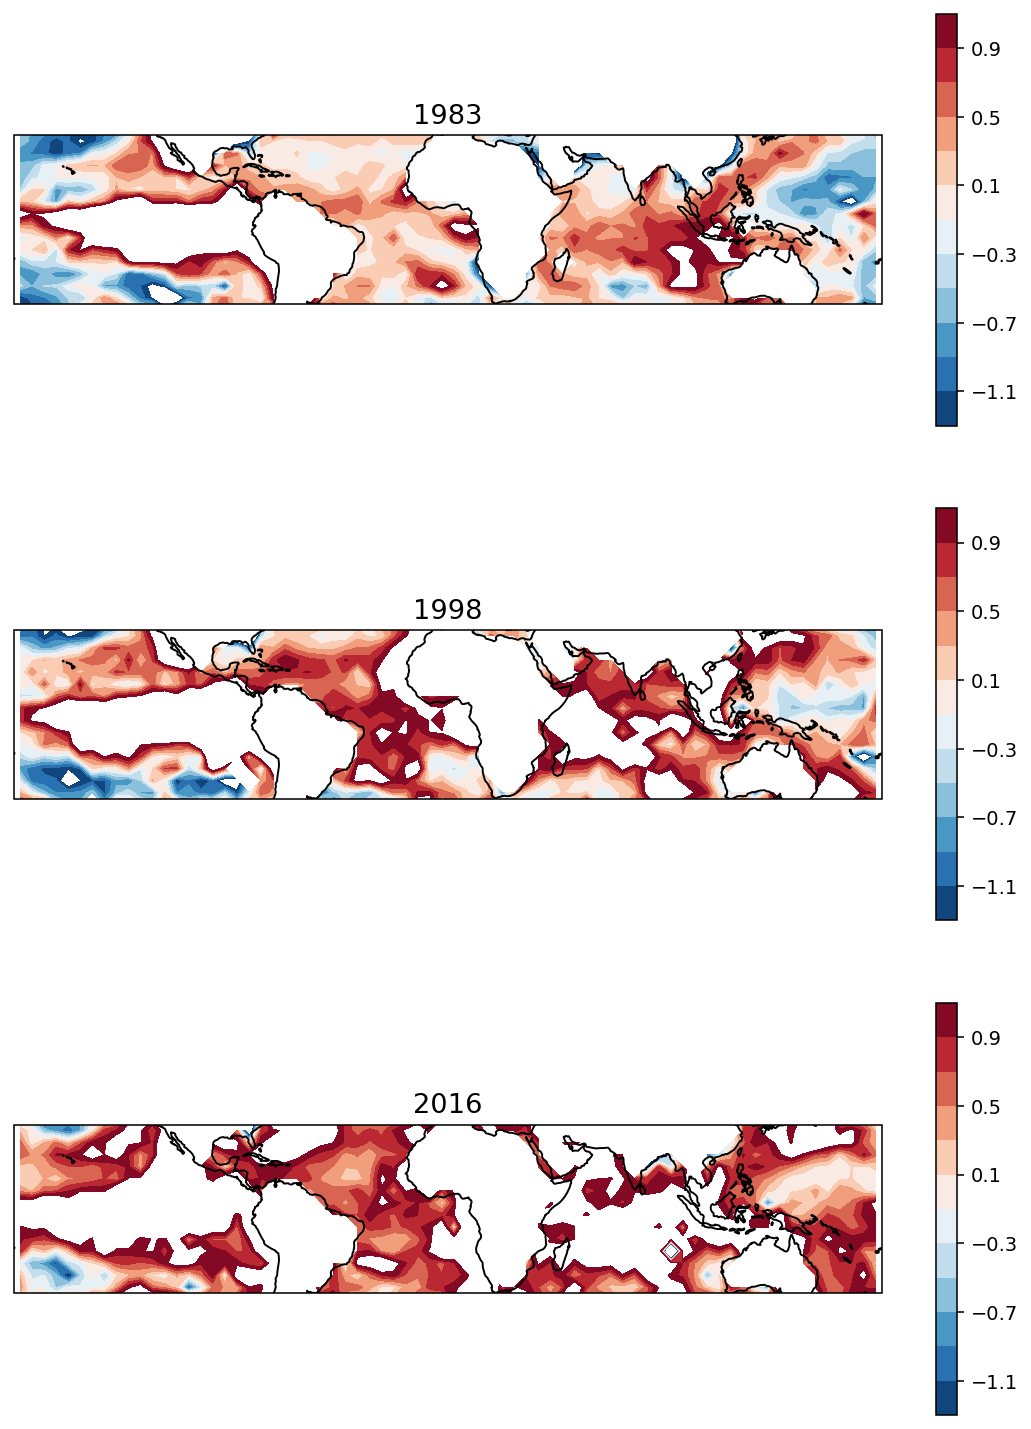

In [32]:
fig = plt.figure(figsize=(10,13),dpi=140)
for iy,year in enumerate([1983,1998,2016]):
    # seleccion de los datos de cada año correspondiente
    year_data=winter_data[winter_data.time.dt.year==year]
    # promedio temporal 
    year_data=year_data.mean('time')
    # generamos la figura del mapa
    ax = fig.add_subplot(3, 1, 1+iy, projection=ccrs.PlateCarree())
    # definimos el extent
    ax.set_extent([80,300, -35, 35], crs=ccrs.PlateCarree())
     
    ax.coastlines()
    cs=ax.contourf(lons,lats,year_data,levels=np.arange(-1.3,1.3,0.2),cmap='RdBu_r',transform=ccrs.PlateCarree())
    # el titulo es el string del año
    plt.title(str(year),fontsize=14)
    plt.colorbar(cs)


Para terminar, vamos a mejorar nuestro mapa. Vamos a hacer varios cambios:

1. Girar el colorbar y hacerlo horizontal. 
2. Agregar extend='both' para hacer que los colorbar no se "quemen" cuando los datos superen el valor establecido por levels. Además vamos a mejorar los niveles. `levels=np.arange(-2.2,2.21,0.2)`. 
3. Agregar gridlines y sus ticks correspondintes. Para esto se usa la instrucción `ax.gridlines()`. Ahora, para entender las palabras clave y formato que se usa en esta instrucción es importante checar antes: http://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html, https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html.

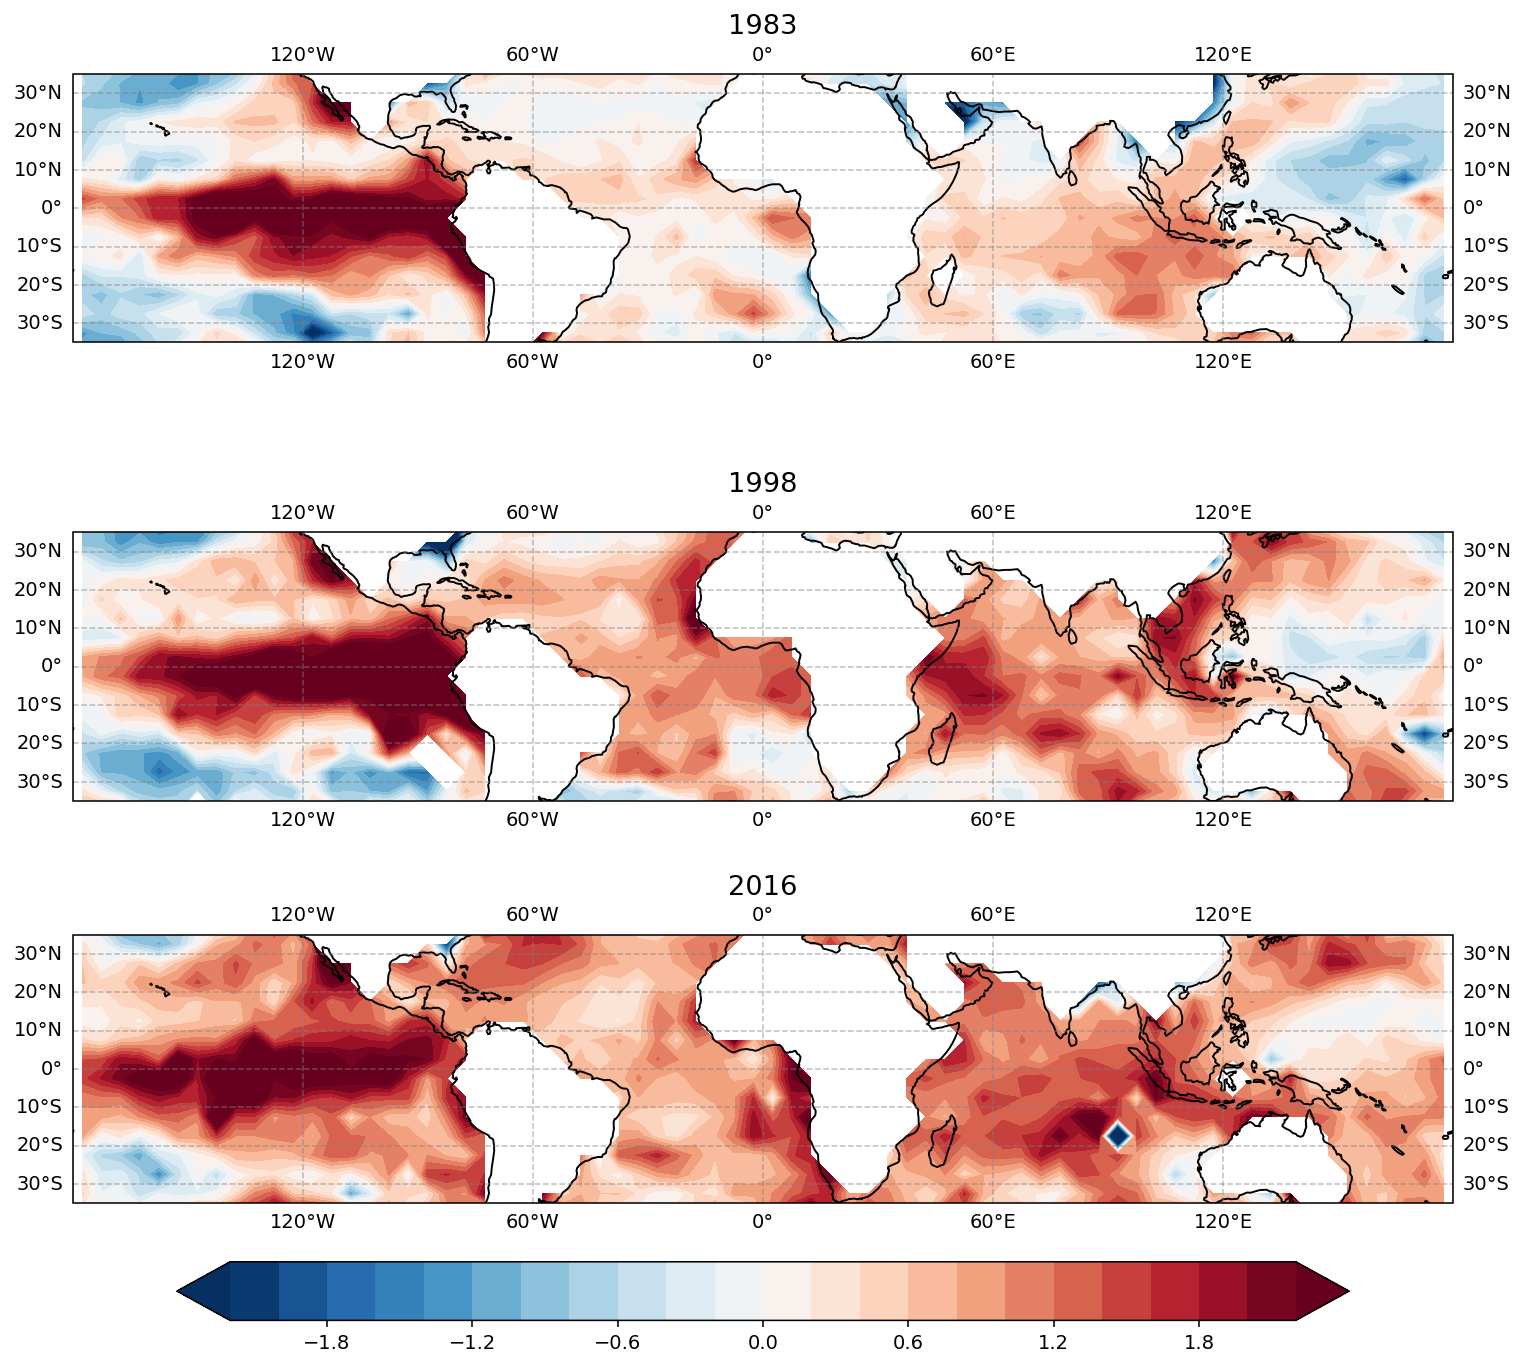

In [33]:
fig = plt.figure(figsize=(11,10),dpi=140)
for iy,year in enumerate([1983,1998,2016]):
    # seleccion de los datos de cada año correspondiente
    year_data=winter_data[(winter_data.time.dt.year==year)]
    # promedio temporal 
    year_data=year_data.mean('time')
    # generamos la figura del mapa
    ax = fig.add_subplot(3, 1, 1+iy, projection=ccrs.PlateCarree())
    # definimos el extent
    ax.set_extent([80,300, -35, 35], crs=ccrs.PlateCarree())
    ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')

    ax.coastlines()
    cs=ax.contourf(lons,lats,year_data,levels=np.arange(-2.2,2.21,0.2),cmap='RdBu_r',transform=ccrs.PlateCarree(),extend='both')
    # el titulo es el string del año
    plt.title(str(year),fontsize=14)

plt.colorbar(cs,orientation='horizontal')
plt.tight_layout()

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 8 - Mapa 2 </font>**

<font color="DarkBlue"> 1. Seleccione 2 eventos de la Niña y calcule sus promedios, para cada evento, para los meses de Oct-Dic. 
    
<font color="DarkBlue"> 2. Grafique los mapas de las anomalías para cada evento con una extensión de mapa que vaya de 45S-45N.  
        
<font color="DarkBlue"> 3. Extras (grafique los mismos mapas pero pa
---